# Cosmology Homework 2
Note: Adapted directly from the `2_distances.ipynb` notebook

In [1]:

import astropy.units as u
import numpy as np
import pylab as plt
from sympy import *
from scipy import integrate


%matplotlib inline

In [2]:
#cosmological parameters
h = 0.7
OmegaM = 0.3
OmegaR = 0.0
OmegaL = 1- OmegaM  #assumes flat


lightspeed = 3e5 *u.km/u.s#km/s

#cosmology funcitons

#Hubble function
def Hz(z):
    H = 100*h* ( 
        OmegaM*(1+z)**3 + 
        OmegaR*(1+z)**4 +
        OmegaL + 
        (1 - OmegaM - OmegaL - OmegaR)*(1+z)**2 )**.5
    return H

#conformal distance
def Dconf(z, **kwargs):
    return lightspeed * np.array([integrate.romberg(dConfDistdz, 0, zi, divmax=15) for zi in z]) * (u.Mpc * u.s / u.km)

def dConfDistdz(z):
    return 1.0 / Hz(z)

#angular diameter distance
def DA(z):
    return Dconf(z)/(1+z)

def DL(z):
    return Dconf(z)*(1+z)

from astropy.coordinates import Angle
# angle subtended via angular diameter distance
def AngleSize(z, length):
    # Since DA = l/theta => theta = l/DA 
    return Angle( (length / DA(z)) * u.rad, unit=u.arcsec)

# Problem 1
We get a minimum angular size at some redshift because there are two competing effects. An object far away is smaller, but also an object that subtends some large amount of the universe will be bigger. As you go back these competing effects balance at some point. At this critical redshift (or time) going back in time a little bit means when observed from present day earth the 1kpc object is in a smaller universe and takes a larger observation angle. At the same time that object is moving further away and is therefore smaller. At the critical redshift these two effects are the same size; however, as you go further back in time the effect of expansion on the angle becomes the larger effect by far.

Values for parts a, b, and c are all printed below


Minimum angular size of 0.118 arcsec achieved at redshift z=1.602


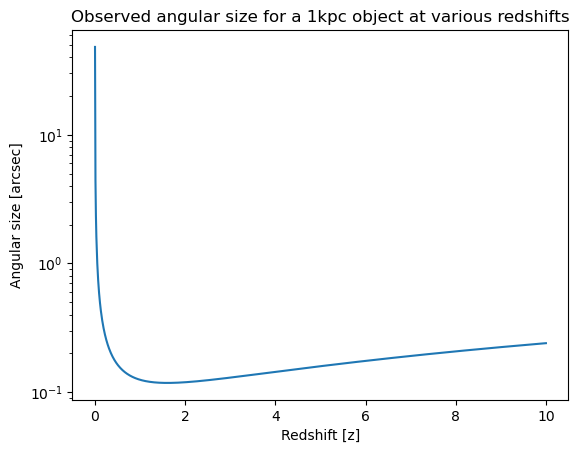

In [3]:
redshift = np.linspace(0.001, 10, num=1000)
angular_size = AngleSize(redshift, 1* u.kpc).to(u.arcsec)

#DAarr = [DA(zarr[i]) for i in range(100)]

fig, ax = plt.subplots(1,1)
ax.plot(redshift, angular_size)
ax.set_title("Observed angular size for a 1kpc object at various redshifts")
ax.set_xlabel("Redshift [z]")
ax.set_ylabel("Angular size [arcsec]")
ax.set_yscale("log")

print(f"Minimum angular size of {np.min(angular_size):.3} achieved at redshift z={redshift[np.argmin(angular_size)]:.4}")

Comoving distance at z=1000.0 is 13.67 Gpc


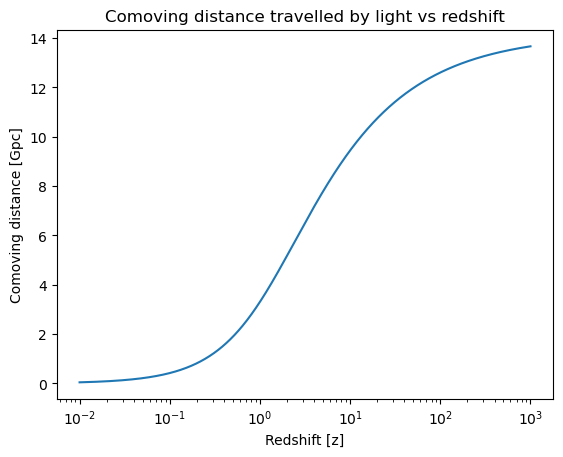

In [4]:
redshift = np.logspace(-2, 3, num=1000, base=10)
comoving_distance = Dconf(redshift).to(u.Gpc)

fig, ax = plt.subplots(1,1)
ax.plot(redshift, comoving_distance)
ax.set_title("Comoving distance travelled by light vs redshift")
ax.set_xlabel("Redshift [z]")
ax.set_xscale("log")

ax.set_ylabel("Comoving distance [Gpc]")

print(f"Comoving distance at z={redshift[-1]:.5} is {comoving_distance[-1]:.4}")

In [5]:
# Angle subtended by the comoving horizon 
z = np.array([1000])
horizon_distance = comoving_distance[-1]
horizon_size_past = (horizon_distance/(1+z))
angular_size = Angle(horizon_size_past/horizon_distance * u.rad, u.deg)
print(f"Size of the Comoving horizon at z=1000: {horizon_size_past[0].to(u.Mpc):.5}")
print(f"Angle subtended by the Comoving horizon at z=1000 is {angular_size[0]:.5}")

Size of the Comoving horizon at z=1000: 13.656 Mpc
Angle subtended by the Comoving horizon at z=1000 is 0.057239 deg


# Problem 2
Reproduce the diagram !

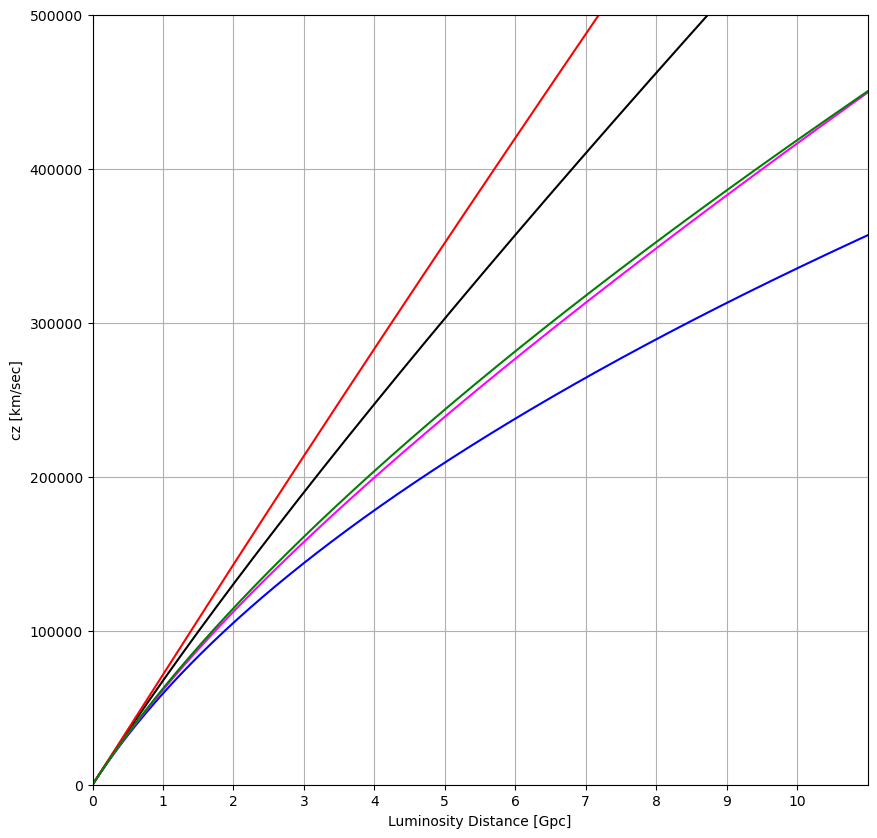

In [6]:
fig, ax = plt.subplots(1,1)
fig.set_figwidth(10)
fig.set_figheight(10)
ax.set_xlim(0,11)
ax.set_ylim(0,500000)
ax.set_xlabel("Luminosity Distance [Gpc]")
ax.set_ylabel("cz [km/sec]")
ax.grid(True)
ax.set_xticks(np.arange(0,11,1))

redshift = np.linspace(0, 2, num=1000)

def plot_universe(ax, redshift, **kwargs):
    luminosity_distance = DL(redshift).to(u.Gpc)
    ax.plot(luminosity_distance, redshift*lightspeed, **kwargs)

h=0.71
OmegaM = 0.27
OmegaL = 0.73
OmegaR = 3e-4

# EdS universe (only matter) 
OmegaM = 1
OmegaL = 1 - OmegaM  #assumes flat
OmegaR = 0
plot_universe(ax, redshift, color="black")

# dS universe (only cosmological constant)
OmegaM = 0
OmegaL = 1 - OmegaM  #assumes flat
OmegaR = 0
plot_universe(ax, redshift, color="blue")

# Flat Dark Energy Model
OmegaM = 0.27
OmegaL = 0.73  #assumes flat
OmegaR = 0
plot_universe(ax, redshift, color="magenta")

# These two don't match the parameters in the problem
# so I found the original diagram here:
# https://astro.ucla.edu/~wright/sne_cosmology.html

# Closed matter only
#
# "Closed Matter only" says matter only only on the plot
# In the text it's just "A closed universe" with Omega = 2
# Setting OmegaR to 0.3 seems to put the line in the right place
OmegaM = 1.7  # Ideally 2.0 for matter only
OmegaL = 0.0
OmegaR = 0.3  # Ideally 0.0 for matter only
plot_universe(ax, redshift, color="red")


# Empty Universe
# Without OmegaL=0.4 it is in very much the wrong place on the diagram
# It still looks like its not separated enough from our universe in this view
# Something still may be wrong, or the Friedman equation Ned Wright used here
# May have a different form.
OmegaM = 0
OmegaL = 0.4  # Ideally 0.0 so we are empty of cosmological constant as well
OmegaR = 0
plot_universe(ax, redshift, color="green")

# Put these ugly global variables back to their correct values!
h = 0.7
OmegaM = 0.3
OmegaR = 0.0
OmegaL = 1- OmegaM  #assumes flat

This was the prof's example of using the DA function

Text(0, 0.5, 'Angular Diameter Distance [Mpc]')

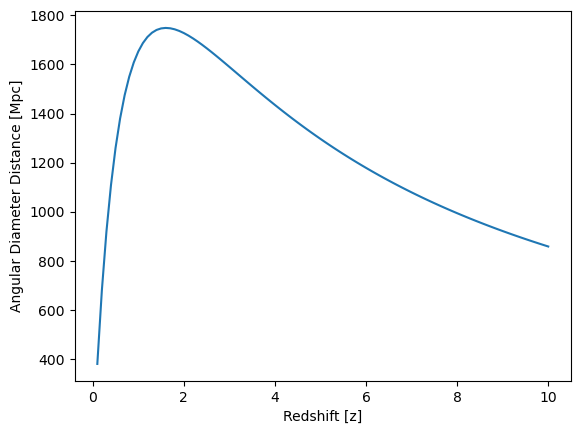

In [7]:
redshift = np.linspace(0.1, 10, num=100)
da = DA(redshift).to(u.Mpc)

#DAarr = [DA(zarr[i]) for i in range(100)]

fig, ax = plt.subplots(1,1)
ax.plot(redshift, da)
ax.set_xlabel("Redshift [z]")
ax.set_ylabel("Angular Diameter Distance [Mpc]")